In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve, inv
from scipy.linalg import solve_banded

In [92]:
def f(x):
    return 1 + (1/2)*np.tanh(2*x)
    

N = 100
x = np.linspace(-2, 2, N)
h = 1e-5

df_dx = (f(x + (h/2)) - f(x - h/2)) / h 

In [78]:
analytical = 1 / np.cosh(2*x)**2

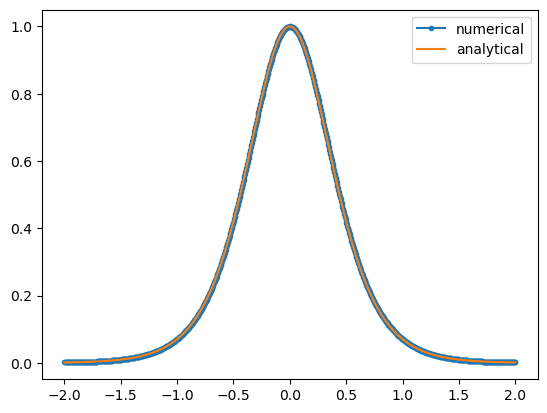

In [79]:
plt.plot(x, df_dx, marker='.', label='numerical')
plt.plot(x, analytical, label='analytical')
plt.legend()

In [80]:
print(analytical - df_dx)

[-7.99884031e-13  1.09932202e-12  6.73191732e-12 -7.86624520e-12
  1.29822086e-12 -7.81582936e-12 -6.39097152e-12  6.81363104e-12
 -4.13168913e-12  2.27295613e-13  3.05814185e-12 -5.64165685e-13
 -2.05163664e-12 -1.09791399e-11  2.08322942e-12 -3.76966037e-12
 -4.84227979e-12  7.94783076e-14 -8.50871088e-12 -2.42555693e-12
  7.19670959e-12 -6.03596405e-12  6.91454164e-12  5.89058012e-12
 -3.29914438e-12 -2.20677643e-13 -3.32962694e-12 -1.33028397e-12
  4.47463420e-12 -8.82696043e-12 -5.91700300e-12  8.98966882e-12
 -5.66408509e-12 -4.42845066e-12  3.08366093e-12  1.00022152e-11
  3.42793415e-12  1.05257816e-13 -6.68579211e-12 -2.80437999e-13
 -4.76443017e-12  6.36024436e-12  1.70845803e-12 -5.47305647e-12
  9.20375755e-13 -1.29840622e-11 -6.19516287e-12  6.67441536e-12
  2.61846447e-12 -2.50936685e-12  4.48377706e-12 -7.34632884e-12
 -1.01832518e-11 -1.43466055e-11  1.39101794e-12 -6.99930175e-12
 -1.30942262e-12 -2.21037078e-12  2.82736811e-12  7.33428639e-12
  3.06196474e-13  1.40264

In [81]:
x

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
       -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
       -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
       -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
       -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
       -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
       -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
       -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
       -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
       -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
       -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
       -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
       -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
       -1.73973974, -1.73573574, -1.73173173, -1.72772773, -1.72

In [93]:
def f1(x):
    return 1 + 1/(2*np.tanh(2*x))

def derive(f, x, h: int = 1e-5):
    return (f(x + (h/2)) - f(x - h/2)) / h 

df_dx1 = (f1(x + (h/2)) - f1(x - h/2)) / h 
# yarr = derive(f1, x)
analytical1 = -1 / (np.sinh(2*x)**2)

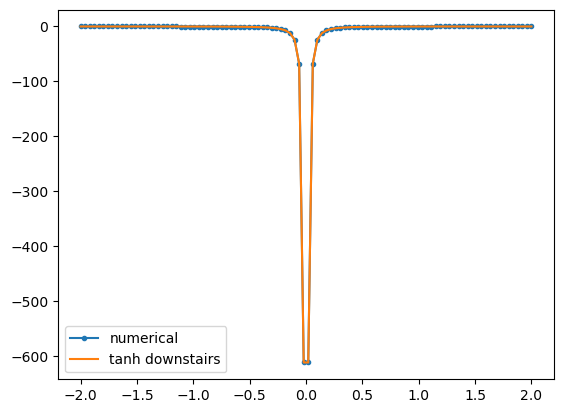

In [94]:
plt.plot(x, df_dx1, marker='.', label='numerical')
# plt.plot(x, yarr, marker='.', label='numerical')
plt.plot(x, analytical1, label='tanh downstairs')
# plt.plot(x, analytical, label='tanh upstairs') 
# plt.ylim(-10000,10000)
# plt.xscale('log')
plt.legend()

In [86]:
df_dx1

array([0.00134095, 0.00136259, 0.00138457, 0.00140691, 0.00142961,
       0.00145267, 0.00147611, 0.00149992, 0.00152412, 0.0015487 ,
       0.00157369, 0.00159908, 0.00162487, 0.00165108, 0.00167772,
       0.00170478, 0.00173228, 0.00176022, 0.00178862, 0.00181747,
       0.00184678, 0.00187657, 0.00190684, 0.0019376 , 0.00196885,
       0.0020006 , 0.00203287, 0.00206566, 0.00209897, 0.00213282,
       0.00216722, 0.00220217, 0.00223769, 0.00227377, 0.00231044,
       0.0023477 , 0.00238556, 0.00242402, 0.00246311, 0.00250283,
       0.00254319, 0.00258419, 0.00262586, 0.0026682 , 0.00271122,
       0.00275493, 0.00279934, 0.00284448, 0.00289033, 0.00293693,
       0.00298427, 0.00303238, 0.00308126, 0.00313093, 0.0031814 ,
       0.00323268, 0.00328479, 0.00333773, 0.00339153, 0.00344619,
       0.00350173, 0.00355817, 0.00361551, 0.00367377, 0.00373298,
       0.00379313, 0.00385425, 0.00391636, 0.00397946, 0.00404358,
       0.00410873, 0.00417492, 0.00424218, 0.00431053, 0.00437

In [87]:
yarr

array([-1.34275124e-03, -1.36444469e-03, -1.38648887e-03, -1.40888944e-03,
       -1.43165217e-03, -1.45478295e-03, -1.47828773e-03, -1.50217253e-03,
       -1.52644355e-03, -1.55110703e-03, -1.57616932e-03, -1.60163688e-03,
       -1.62751628e-03, -1.65381417e-03, -1.68053736e-03, -1.70769273e-03,
       -1.73528728e-03, -1.76332811e-03, -1.79182246e-03, -1.82077770e-03,
       -1.85020126e-03, -1.88010075e-03, -1.91048388e-03, -1.94135850e-03,
       -1.97273254e-03, -2.00461414e-03, -2.03701150e-03, -2.06993300e-03,
       -2.10338711e-03, -2.13738248e-03, -2.17192788e-03, -2.20703225e-03,
       -2.24270463e-03, -2.27895425e-03, -2.31579045e-03, -2.35322275e-03,
       -2.39126084e-03, -2.42991453e-03, -2.46919380e-03, -2.50910883e-03,
       -2.54966990e-03, -2.59088750e-03, -2.63277232e-03, -2.67533514e-03,
       -2.71858699e-03, -2.76253905e-03, -2.80720269e-03, -2.85258946e-03,
       -2.89871109e-03, -2.94557956e-03, -2.99320694e-03, -3.04160558e-03,
       -3.09078801e-03, -

# Interpolation

In [25]:
x = [0,1,2,3,4]
f = [1.,2.,5.,10.,17.]

def interpolate(arr, f, x):
    idx = np.searchsorted(arr, x)
    print(idx)
    
    if idx == 0:
        return arr[0]
    elif idx == len(arr):
        return arr[-1]
    
    a, b = arr[idx - 1], arr[idx]
    print(a,b)
    
    y = f[a] + ((x - arr[a]) / (arr[b] - arr[a])) * (f[b] - f[a])
    
    return y

interpolated_value = interpolate(x, f, 1.3)
print(f"Interpolated value: {interpolated_value}")


2
1 2
Interpolated value: 2.9000000000000004


# Gaussian Elimination with Backsub

In [4]:
A = np.array([[2.,1,4,1],
             [3,4,-1,-1],
             [1,-4,1,5],
             [2,-2,1,3]])
v = np.array([-4.,3,9,7])


In [11]:
################
# for-loops
################

# Gaussian elim
def gausselim(A,v):
    N = len(v)
    for m in range(N):
        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]

    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x
        
print(gausselim(A,v))

[ 2. -1. -2.  1.]


### Partial Pivoting

In [49]:
A1 = np.array([[0,1.,4,1],
               [3,4,-1,-1],
               [1,-4,1,5],
               [2,-2,1,3]])

v1 = np.array([-4.,3,9,7])

In [50]:
def part_pivot(A,v):
    N = len(v)
    for m in range(N):
        
        # check the row and swap if mth row 
        # does not have max value at mth element
        idx = np.argmax(np.abs(A[m:,m])) + m
        if idx != m:
            A[[m, idx], :] = A[[idx, m], :]
            v[[m, idx]] = v[[idx, m]]

        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x

In [51]:
part_pivot(A,v)

array([ 2., -1., -2.,  1.])

In [52]:
part_pivot(A1,v1)

array([ 1.61904762, -0.42857143, -1.23809524,  1.38095238])

In [5]:
x = solve(A,v)
x

array([ 2., -1., -2.,  1.])

In [7]:
X = inv(A)
X

array([[-0.11764706, -0.05882353, -0.58823529,  1.        ],
       [ 0.17647059,  0.33823529,  0.63235294, -1.        ],
       [ 0.23529412, -0.13235294, -0.07352941,  0.        ],
       [ 0.11764706,  0.30882353,  0.83823529, -1.        ]])

### tridiagonal matrices

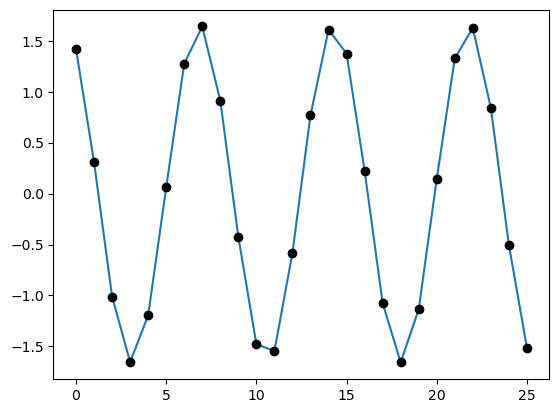

In [56]:
# constants
N = 26
C = 1.
m = 1.
k = 6.
omega = 2.
alpha = 2*k-(m*omega**2)

# set up init values of arrays
A = np.zeros([N,N])
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k

A[0,0] = alpha - k
A[N-1,N-1] = alpha - k
v = np.zeros(N)
v[0]=C

# print("A before Gaussian elim")
# print(A)

# Gussian elim
for i in range(N-1):

    # divide row i by its diagonal elem
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]
    # print(f"i: {i}")
    # print(f"A after division at i={i}")
    # print(A)

    # sub from next row down
    A[i+1,i+1] -= A[i+1, i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]
    # print(f"A after subtracting next row at i={i}")
    # print(A)

# divide last elem of v by last diag elem
v[N-1] /= A[N-1, N-1]
# print("A after dividing last elem of v by last diag elem")
# print(v)

# backsub
x = np.zeros(N)
x[N-1] = v[N-1]
for i in range(N-2, -1, -1):
    x[i] = v[i] - A[i, i+1]*x[i+1]
    # print(x[i])

# plot
plt.plot(x)
plt.plot(x, "ko")
plt.show()

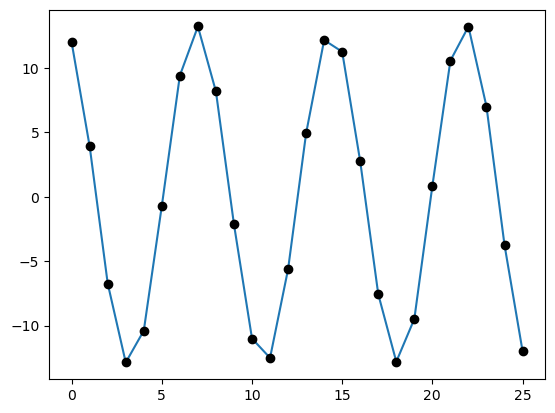

In [57]:
A1 = np.zeros([3,N])
A1[0,:] = -k
A1[1,:] = alpha
A1[2,:] = -k
A1[1,0] = alpha - k
A1[1,N-1] = alpha - k

x1 = solve_banded((1,1),A1,v)
plt.plot(x1)
plt.plot(x1, 'ko')
plt.show()

### Eigenvalues and Eigenvectors